In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/iris.csv')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.duplicated().sum()

3

In [9]:
data.drop_duplicates(inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

In [17]:
data['species'] = LabelEncoder().fit_transform(data['species'])

In [10]:
from sklearn.cluster import KMeans

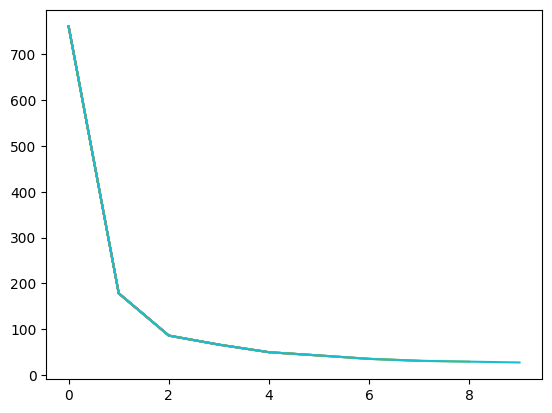

In [18]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
  plt.plot(wcss)
plt.show()

In [31]:
from kneed import KneeLocator

In [36]:
knee = KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')

In [37]:
knee.knee

3

In [59]:
kmeans = KMeans(n_clusters=3,init = 'k-means++')

In [60]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [61]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

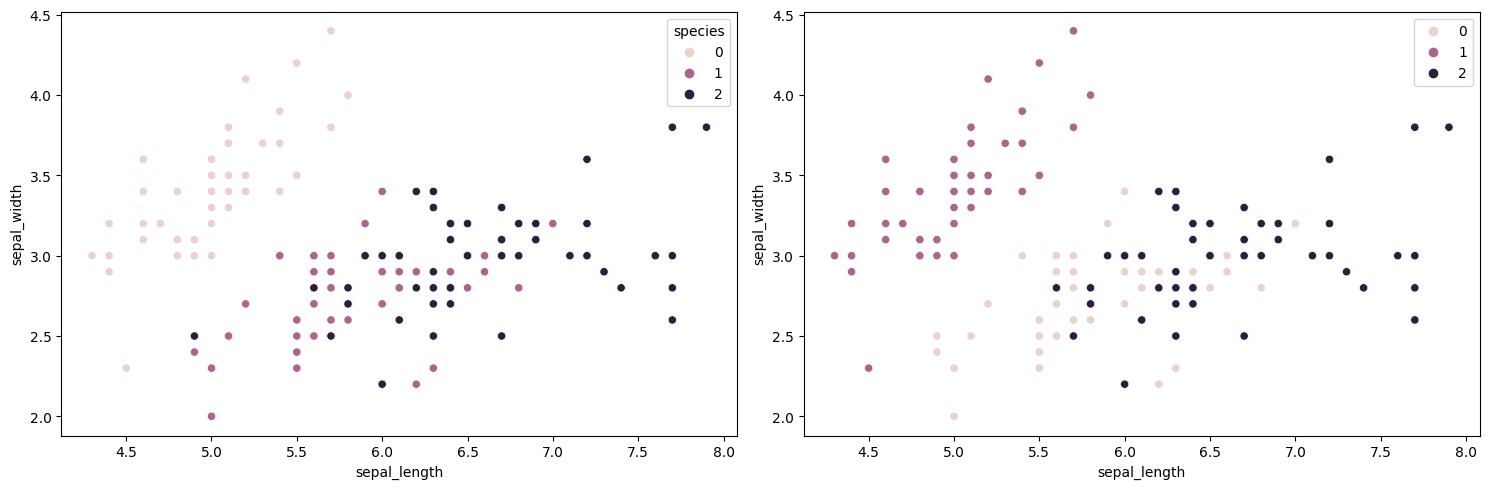

In [62]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = data.sepal_length, y = data.sepal_width, hue = data.species)
plt.subplot(1,2,2)
sns.scatterplot(x = data.sepal_length, y = data.sepal_width, hue = kmeans.labels_)
plt.tight_layout()

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
silhouette_score(data,kmeans.labels_)

0.580551596715356

In [63]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

In [64]:
 link = linkage(data,method = 'complete',metric = 'euclidean')

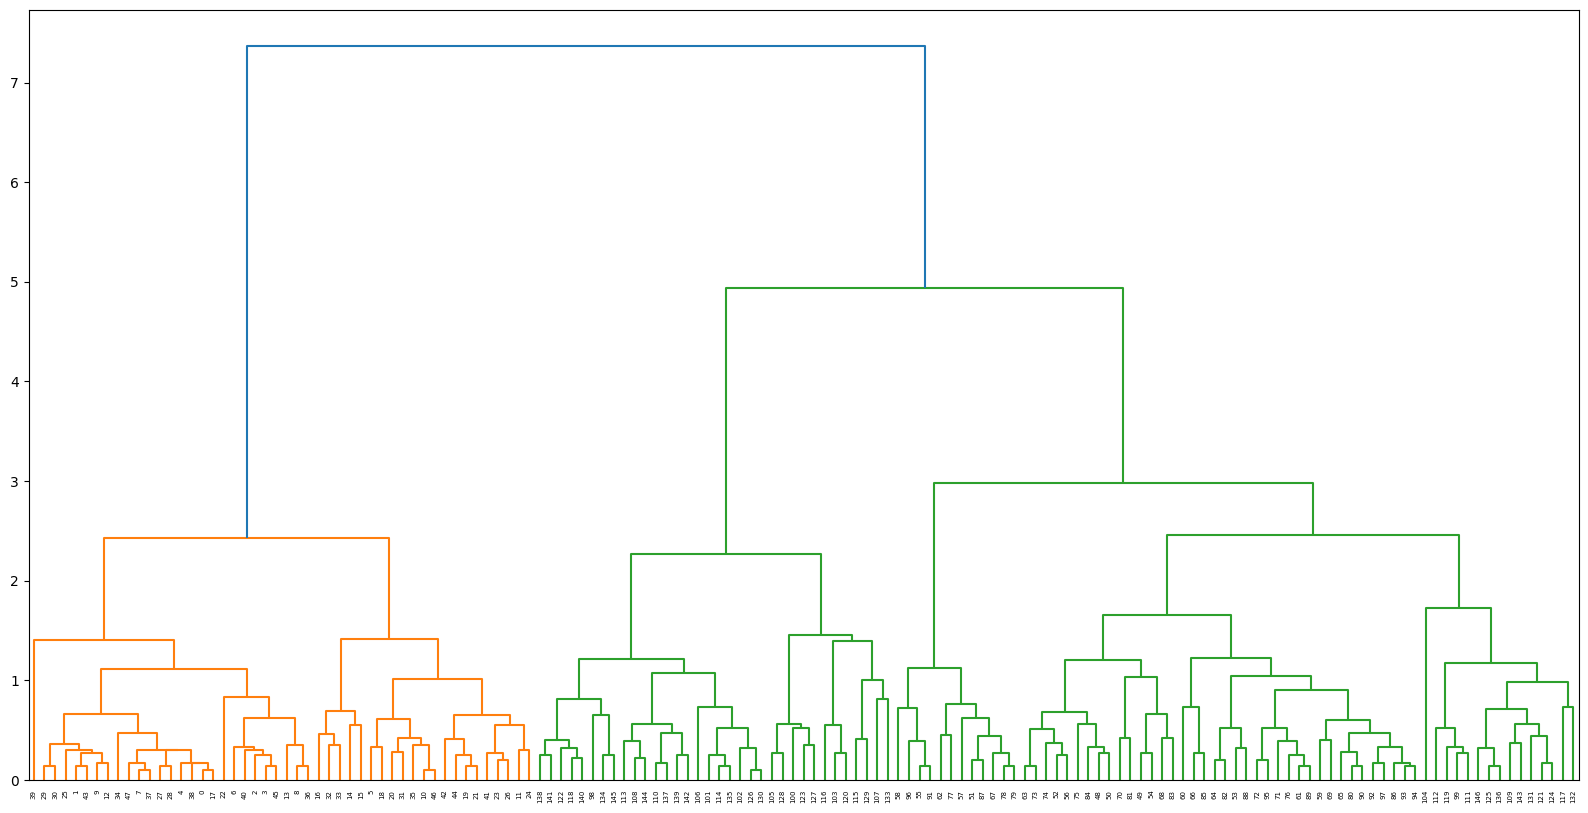

In [75]:
plt.figure(figsize = (20,10))
dendrogram(link)
plt.show()

In [79]:
score = []
for i in range(2,11):
  h_cluster = AgglomerativeClustering(n_clusters = i,metric = 'euclidean', linkage = 'ward')
  h_cluster.fit(data)
  label = h_cluster.labels_
  score.append(silhouette_score(data,label))
score

[0.679042152561942,
 0.5765853610125551,
 0.5462874045844981,
 0.5136330631322907,
 0.5089055578038687,
 0.38591377125966514,
 0.3792219241114878,
 0.3528782153582978,
 0.33538914386034413]

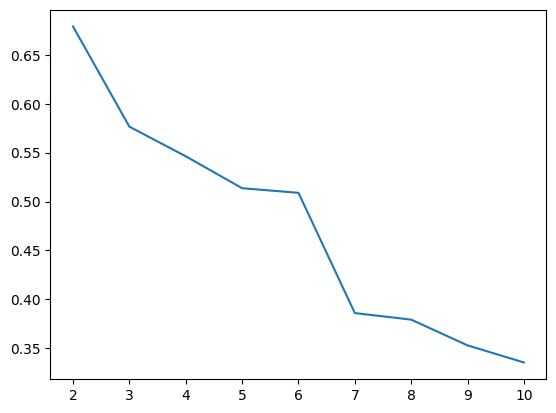

In [80]:
plt.plot(range(2,11),score)

In [83]:
h_clusters = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
h_clusters.fit(data)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

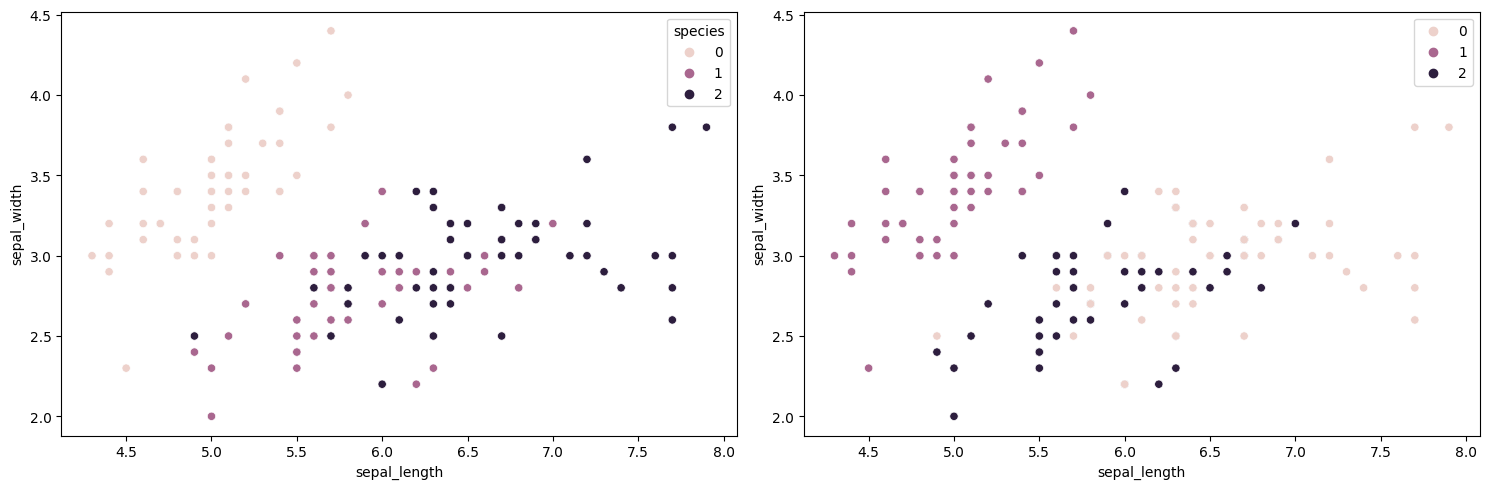

In [84]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = data.sepal_length, y = data.sepal_width, hue = data.species)
plt.subplot(1,2,2)
sns.scatterplot(x = data.sepal_length, y = data.sepal_width, hue = h_clusters.labels_)
plt.tight_layout()

In [95]:
from sklearn.cluster import DBSCAN

In [111]:
dbscan = DBSCAN(eps = 1.0)

In [112]:
dbscan.fit(data)

DBSCAN(eps=1.0)

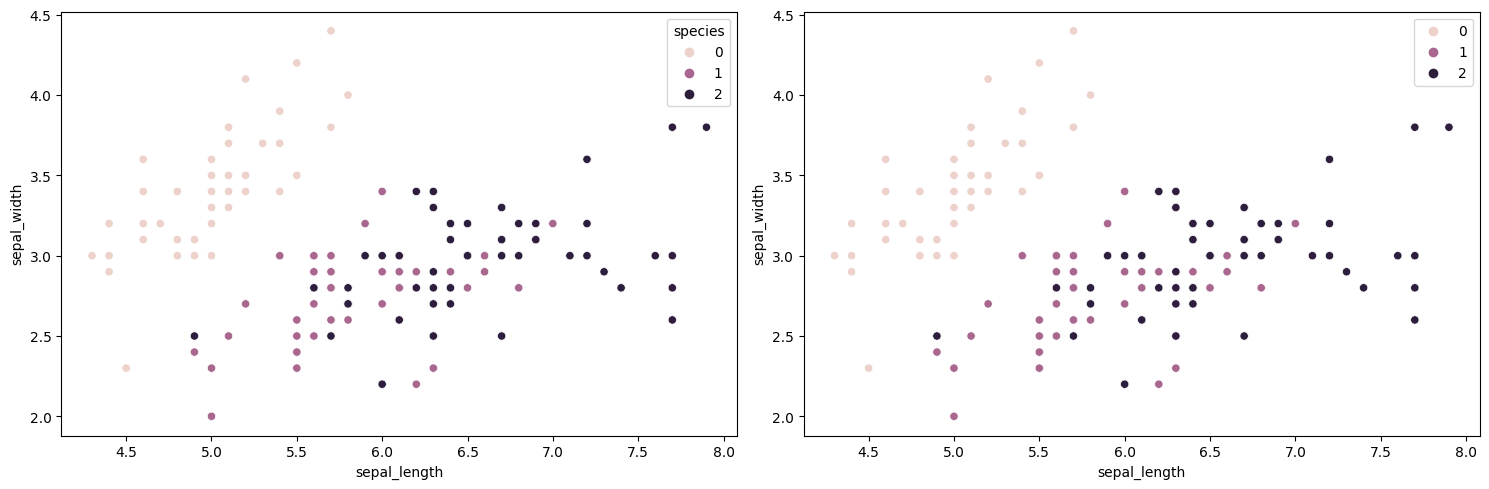

In [113]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = data.sepal_length, y = data.sepal_width, hue = data.species)
plt.subplot(1,2,2)
sns.scatterplot(x = data.sepal_length, y = data.sepal_width, hue = dbscan.labels_)
plt.tight_layout()